# Setting and Download

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import seaborn as sns

######################################
import random

######################################
import os
import zipfile
import glob
#from pathlib import Path

######################################
#from PIL import Image, ImageDraw
import matplotlib.image as mpimg


######################################
#import sklearn


######################################
import tensorflow as tf

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop



## Download and extract datasets

In [2]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps.zip \
    -O rps.zip
  
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps-test-set.zip \
    -O rps-test-set.zip

--2021-03-09 15:29:20--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.8.16, 172.217.13.240, 172.217.13.80, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.8.16|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 200682221 (191M) [application/zip]
Saving to: ‘rps.zip’

rps.zip             100%[===================>] 191.38M  77.7MB/s    in 2.5s    

2021-03-09 15:29:23 (77.7 MB/s) - ‘rps.zip’ saved [200682221/200682221]

--2021-03-09 15:29:23--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps-test-set.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.73.208, 172.217.7.240, 172.217.8.16, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.73.208|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29516758 (28M) [application/zip]
Saving to: ‘rps-test-set.zip’

rp

In [3]:
root_path = os.getcwd()

local_zip = os.path.join(root_path, 'rps.zip')
with zipfile.ZipFile(local_zip, 'r') as zip_ref: 
    zip_ref.extractall()

local_zip = os.path.join(root_path, 'rps-test-set.zip')
with zipfile.ZipFile(local_zip, 'r') as zip_ref: 
    zip_ref.extractall()

# EDA on the original dataset

In [4]:
train_dir = os.path.join(root_path, 'rps')
validation_dir = os.path.join(root_path, 'rps-test-set')

In [5]:
all_train_file_paths_pattern = os.path.join(train_dir, '**/*')
all_val_file_paths_pattern = os.path.join(validation_dir, '**/*')

all_train_file_paths = glob.glob(all_train_file_paths_pattern)
all_val_file_paths = glob.glob(all_val_file_paths_pattern)
print("Number of train images:", len(all_train_file_paths))
print("Number of validation images:", len(all_val_file_paths))

Number of train images: 2520
Number of validation images: 372


In [6]:
paper_dir_train = os.path.join(train_dir, 'paper')
rock_dir_train = os.path.join(train_dir, 'rock')
scissors_dir_train = os.path.join(train_dir, 'scissors')

print("In training set:")
print("Number of 'paper' images ", len(os.listdir(paper_dir_train)))
print("Number of 'rock' images ", len(os.listdir(rock_dir_train)))
print("Number of 'scissors' images ", len(os.listdir(scissors_dir_train)))

In training set:
Number of 'paper' images  840
Number of 'rock' images  840
Number of 'scissors' images  840


In [7]:
def show_images_from_directionry_randomly(list_file_paths, n=3):
    fig = plt.gcf() 
    fig.set_size_inches(11,8)
    for i in range(n):
        file_path = random.choice(list_file_paths)
        class_name = file_path.split(os.path.sep)[-2]
        img = mpimg.imread(file_path)
        plt.subplot(1,n,i+1)
        plt.imshow(img)
        plt.title(class_name)

Some images in the training set:


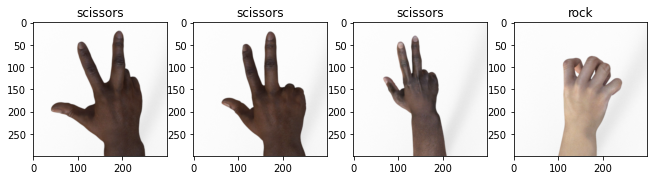

In [15]:
print('Some images in the training set:')
show_images_from_directionry_randomly(all_train_file_paths, 4)

Some images in the validation set:


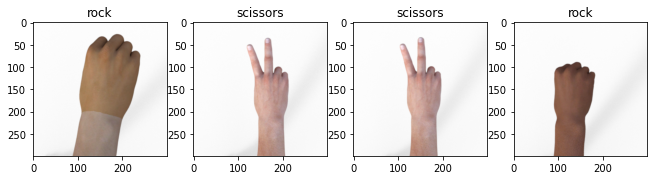

In [17]:
print('Some images in the validation set:')
show_images_from_directionry_randomly(all_val_file_paths, 4)

# Dataset for training with Preprocessing  and Augmentation

In [18]:
training_datagen = ImageDataGenerator(
      rescale = 1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

validation_datagen = ImageDataGenerator(rescale = 1./255)

In [19]:
train_generator = training_datagen.flow_from_directory(
    train_dir,
    target_size=(150,150),
    class_mode='categorical',
    batch_size=126
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(150,150),
    class_mode='categorical',
    batch_size=126
)

Found 2520 images belonging to 3 classes.
Found 372 images belonging to 3 classes.


# 3. Deep Learning Model

In [21]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

model.summary()

model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])



Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 72, 72, 64)        36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 15, 15, 128)      

In [22]:
history = model.fit(train_generator, 
                    epochs=25, steps_per_epoch=20, 
                    validation_data = validation_generator, verbose = 1, validation_steps=3)

model.save("rps.h5")

Epoch 1/25
20/20 [==============================] - 21s 1s/step - loss: 1.1788 - accuracy: 0.3452 - val_loss: 1.0890 - val_accuracy: 0.3441
Epoch 2/25
20/20 [==============================] - 19s 952ms/step - loss: 1.0666 - accuracy: 0.4084 - val_loss: 0.7672 - val_accuracy: 0.7957
Epoch 3/25
20/20 [==============================] - 19s 956ms/step - loss: 0.8863 - accuracy: 0.5899 - val_loss: 0.6083 - val_accuracy: 0.6909
Epoch 4/25
20/20 [==============================] - 19s 947ms/step - loss: 0.6732 - accuracy: 0.6913 - val_loss: 0.3261 - val_accuracy: 0.8495
Epoch 5/25
20/20 [==============================] - 19s 953ms/step - loss: 0.5968 - accuracy: 0.7398 - val_loss: 0.3165 - val_accuracy: 0.8952
Epoch 6/25
20/20 [==============================] - 19s 953ms/step - loss: 0.4757 - accuracy: 0.7949 - val_loss: 0.1730 - val_accuracy: 0.9543
Epoch 7/25
20/20 [==============================] - 19s 950ms/step - loss: 0.3999 - accuracy: 0.8431 - val_loss: 0.1187 - val_accuracy: 0.9543
Ep

In [23]:
acc      = history.history[     'accuracy' ]
val_acc  = history.history[ 'val_accuracy' ]
loss     = history.history[    'loss' ]
val_loss = history.history['val_loss' ]

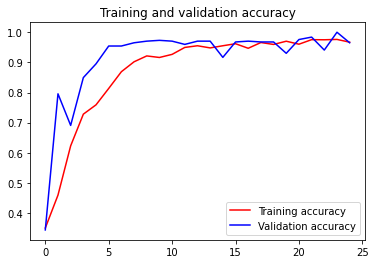

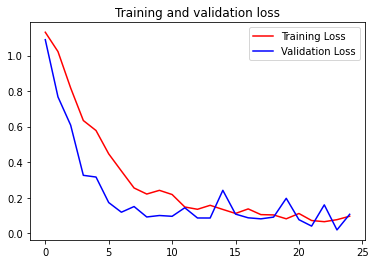

In [24]:
epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}): # compare at the end of each epoch
        if(logs.get('accuracy') > 0.99):
            self.model.stop_training = True

In [ ]:
model.fit(x_train, y_train, epochs=10, callbacks=[callbacks])